In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [6]:
cust_a=pd.read_csv('Customer Acqusition.csv')
repay=pd.read_csv('Repayment.csv')
spend=pd.read_csv('spend.csv')


In [7]:
spend=spend.drop(["Sl No:"],axis=1)
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [8]:
repay=repay.drop(["Unnamed: 4","SL No:"],axis=1)
repay.dropna(inplace=True)
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [9]:
 #a. In case age is less than 18, replace it with mean of age values
cust_a.Age=np.where(cust_a.Age<18,np.mean(cust_a.Age),cust_a.Age)



In [10]:
# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [11]:
table1=pd.merge(left=cust_a,right=spend,left_on='Customer',right_on='Customer',how='inner')


In [12]:
table1.Amount=np.where(table1.Amount>table1.Limit,table1.Limit*0.5,table1.Amount)
table1

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


In [13]:
 #c. Incase the repayment amount is more than the limit, replace the repayment with the limit.b

In [14]:
table2=pd.merge(left=cust_a,right=repay,left_on='Customer',right_on='Customer',how='inner')
table2

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [15]:
table2.Amount=np.where(table2.Amount>table2.Limit,table1.Limit,table2.Amount)
table2.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [16]:
#2. From the above dataset create the following summaries:  
#a. How many distinct customers exist?

In [17]:
table3=pd.merge(left=table1,right=table2,left_on='Customer',right_on='Customer',how='inner')
table3


,No_x,Customer,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,Month_x,Type,Amount_x,No_y,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


In [1261]:
table3.Customer.nunique()

100

In [1262]:
#b. How many distinct categories exist?

In [1263]:
cust_a["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [1264]:
#c. What is the average monthly spend by customers?

In [1265]:
spend['Month']=pd.to_datetime(spend['Month'])
spend['monthly']=spend['Month'].dt.strftime('%B')
spend['yearly']=spend['Month'].dt.strftime('%Y')
spend

,Customer,Month,Type,Amount,monthly,yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [1266]:
round(spend.pivot_table(index=['yearly','monthly'],values='Amount',aggfunc='mean'),2)

Amount
yearly monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

In [1267]:
#  d. What is the average monthly repayment by customers?

In [1268]:
repay['Month']=pd.to_datetime(repay['Month'])
repay['monthly']=repay['Month'].dt.strftime('%B')
repay['yearly']=repay['Month'].dt.strftime('%Y')
repay

,Customer,Month,Amount,monthly,yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,May,2005
1496,A68,2006-05-10,319836.49,May,2006
1497,A69,2006-07-11,247628.45,July,2006
1498,A70,2005-08-12,454016.51,August,2005


In [1269]:
round(repay.pivot_table(index=['yearly','monthly',],values='Amount',aggfunc='mean'),2)

Amount
yearly monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

In [1270]:
#e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. 
#Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts

In [1271]:
last = pd.merge(left=table1,right=repay,on="Customer",how="inner")

In [1272]:
last.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)
last

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,monthly,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,2004-01-15,25682.73,January,2004


In [1273]:
profit_amount =last.pivot_table(index=['yearly','monthly'],values=["Spend_Amount","Repay_Amount"],aggfunc='sum')


In [1274]:
profit_amount["M_Profit"] = profit_amount.Repay_Amount - profit_amount.Spend_Amount
profit_amount.head(10)

Repay_Amount  Spend_Amount      M_Profit
yearly monthly                                            
2004   April      2.285403e+08  1.194516e+08  1.090887e+08
       February   1.602419e+08  7.613922e+07  8.410268e+07
       January    1.699210e+09  1.088357e+09  6.108525e+08
       March      8.974470e+07  5.594171e+07  3.380298e+07
       May        1.411594e+08  8.800456e+07  5.315485e+07
       November   7.860290e+07  5.504612e+07  2.355678e+07
       September  8.016122e+07  5.144278e+07  2.871844e+07
2005   April      1.747894e+08  9.366405e+07  8.112539e+07
       August     2.477449e+08  1.361400e+08  1.116049e+08
       December   9.944533e+07  4.348638e+07  5.595895e+07

In [1275]:
positive_profit=profit_amount.loc[profit_amount["M_Profit"]>0]
positive_profit.head(10)

Repay_Amount  Spend_Amount      M_Profit
yearly monthly                                            
2004   April      2.285403e+08  1.194516e+08  1.090887e+08
       February   1.602419e+08  7.613922e+07  8.410268e+07
       January    1.699210e+09  1.088357e+09  6.108525e+08
       March      8.974470e+07  5.594171e+07  3.380298e+07
       May        1.411594e+08  8.800456e+07  5.315485e+07
       November   7.860290e+07  5.504612e+07  2.355678e+07
       September  8.016122e+07  5.144278e+07  2.871844e+07
2005   April      1.747894e+08  9.366405e+07  8.112539e+07
       August     2.477449e+08  1.361400e+08  1.116049e+08
       December   9.944533e+07  4.348638e+07  5.595895e+07

In [1276]:
positive_profit["M_interest"] = positive_profit.M_Profit *0.029
round(positive_profit,0)
#answer check again M_interest

Repay_Amount  Spend_Amount     M_Profit  M_interest
yearly monthly                                                       
2004   April      2.285403e+08  1.194516e+08  109088679.0   3163572.0
       February   1.602419e+08  7.613922e+07   84102676.0   2438978.0
       January    1.699210e+09  1.088357e+09  610852460.0  17714721.0
       March      8.974470e+07  5.594171e+07   33802981.0    980286.0
       May        1.411594e+08  8.800456e+07   53154851.0   1541491.0
       November   7.860290e+07  5.504612e+07   23556780.0    683147.0
       September  8.016122e+07  5.144278e+07   28718444.0    832835.0
2005   April      1.747894e+08  9.366405e+07   81125389.0   2352636.0
       August     2.477449e+08  1.361400e+08  111604891.0   3236542.0
       December   9.944533e+07  4.348638e+07   55958949.0   1622810.0
       February   9.416163e+08  5.890557e+08  352560618.0  10224258.0
       January    1.810333e+08  1.324129e+08   48620420.0   1409992.0
       July       7.997268e+07  3.995653e+07   40016149.0   1160468.0
       June       2.213774e+08  1.174019e+08  103975517.0   3015290.0
       May        1.099197e+09  7.149030e+08  384294444.0  11144539.0
       November   2.763119e+08  1.532278e+08  123084058.0   3569438.0
       October    6.027830e+07  3.140993e+07   28868370.0    837183.0
       September  7.530449e+07  3.195551e+07   43348984.0   1257121.0
2006   April      6.093666e+08  3.229722e+08  286394374.0   8305437.0
       August     7.167032e+07  5.849630e+07   13174018.0    382047.0
       December   7.087702e+07  4.585222e+07   25024804.0    725719.0
       February   2.903280e+08  1.654843e+08  124843635.0   3620465.0
       January    8.974491e+07  5.127574e+07   38469168.0   1115606.0
       July       2.245720e+08  1.444093e+08   80162709.0   2324719.0
       June       6.914431e+07  5.302118e+07   16123126.0    467571.0
       March      1.115725e+09  7.393854e+08  376340025.0  10913861.0
       May        5.434823e+08  3.297954e+08  213686912.0   6196920.0
       November   1.355832e+08  1.124836e+08   23099549.0    669887.0
       October    7.890924e+07  5.285822e+07   26051016.0    755479.0
       September  8.083199e+07  5.395681e+07   26875182.0    779380.0

In [1277]:
#f. What are the top 5 product types?

In [1278]:
spend.pivot_table(index='Type',values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).head(5)

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


In [1279]:
#g. Which city is having maximum spend? 

In [1352]:
table3=pd.merge(left=spend,right=cust_a,left_on='Customer',right_on='Customer',how='left')

In [1353]:
table3.pivot_table(index='City',values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).head(1)

,Amount
City,
COCHIN,73495349.26


In [1282]:
 #h. Which age group is spending more money?

In [1283]:
table1['Age_group']=np.where((table6.Age>=12)&(table6.Age<=20),'Tennager',
np.where((table6.Age>=21)&(table6.Age<=30),'Young',np.where((table6.Age>=31)&(table6.Age<=45),'Middle_age',
np.where((table6.Age>=46)&(table6.Age<=60),'matured','elderly'))))


In [1284]:
table1

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,elderly
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,elderly
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,elderly
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,elderly
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,Young
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,Young
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,Young
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,Young


In [1285]:
round(table6.pivot_table(index='new_column',values='Amount',aggfunc='sum'),1).sort_values(by='new_column',ascending=False).head(1)

,Amount
new_column,
matured,117354725.8


In [1286]:
#i. Who are the top 10 customers in terms of repayment?

In [1287]:
repay.pivot_table(index='Customer',values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


In [44]:
#3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [1297]:
table1["Month"] = pd.to_datetime(table1["Month"])
table1['monthly']=table1['Month'].dt.strftime('%B')
table1['yearly']=table1['Month'].dt.strftime('%Y')

In [1306]:
output_plot = table1.pivot_table(index=["City","yearly"],columns='Product',values="Amount",aggfunc='sum')
output_plot

Product                   Gold    Platimum      Silver
City       yearly                                     
BANGALORE  2004     9289878.54  1112732.30  1291852.58
           2005    12892362.99   912284.97   830612.34
           2006    12030611.09   685831.27  1415480.94
BOMBAY     2004     6987853.53   897264.94   532089.03
           2005     8983018.28   711804.94   508988.54
           2006     7917144.31   972130.01  1092833.80
CALCUTTA   2004     7477140.98  2037690.30   500006.00
           2005    10303355.80  4434696.31   440147.06
           2006    11167532.77  3589606.66  1157956.42
CHENNAI    2004     1059618.50  3535652.38   282056.86
           2005     3740945.58  5053956.32   377184.49
           2006     2704288.62  5024923.40   350009.50
COCHIN     2004     7315850.15  3419904.07   814229.62
           2005    12110613.03  4960921.71   652269.38
           2006    10499142.38  4920592.29  1269990.87
DELHI      2004     2806495.00   283512.89   768172.30
           2005     1964845.27   494157.86   612311.21
           2006     2957103.32   176788.72   854899.97
PATNA      2004     2072567.90  1113069.60   756684.10
           2005     3252615.77  2883231.07   950094.19
           2006     2276181.69  1256137.65   700005.00
TRIVANDRUM 2004     2415102.84  2161676.67   209667.48
           2005     1240375.85  3601443.30   269912.99
           2006     2735710.87  2147403.75   555862.12

<AxesSubplot:xlabel='City,yearly'>

<Figure size 864x2160 with 0 Axes>

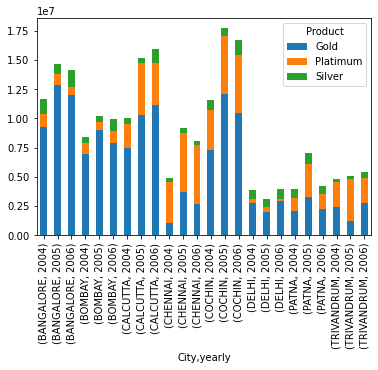

In [1307]:
plt.figure(figsize = (12,30))
output_plot.plot(kind='bar',stacked=True)

In [1311]:
#4. Create graphs 
#a. Monthly comparison of total spends, city wise

In [1312]:
output_plot2=table1.pivot_table(index=['City'],values='Amount',columns='monthly',aggfunc='sum')

In [1313]:
output_plot2

monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


<AxesSubplot:xlabel='City'>

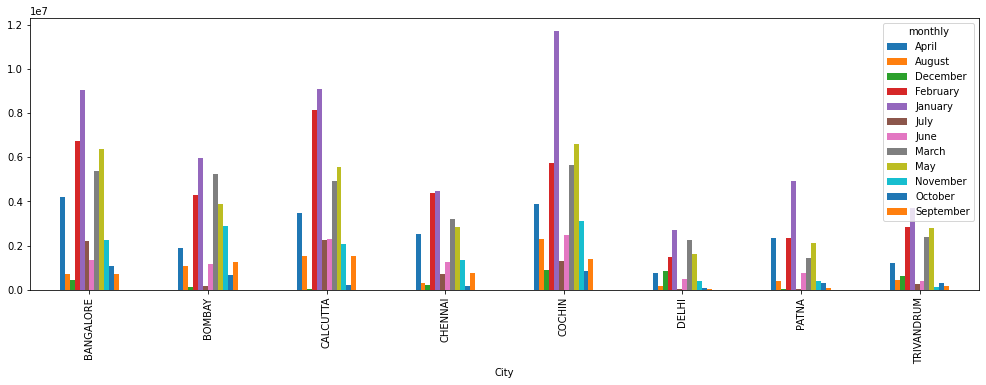

In [1314]:
output_plot2.plot(kind='bar',figsize=(17,5))

In [1325]:
#b. Comparison of yearly spend on air tickets

output3=table1.loc[table1.Type=='AIR TICKET']

In [1326]:
output_plot3=output3.pivot_table(index=['yearly','Type'],values='Amount',aggfunc='sum')

In [1327]:
output_plot3

,,Amount
yearly,Type,
2004,AIR TICKET,4357225.35
2005,AIR TICKET,10550152.21
2006,AIR TICKET,5248469.56


<AxesSubplot:xlabel='yearly,Type'>

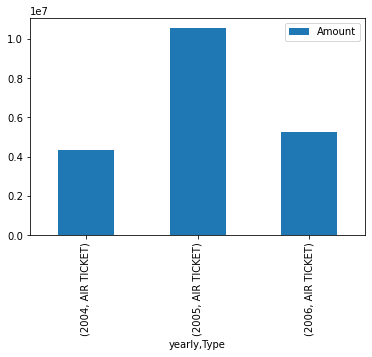

In [1328]:
output_plot3.plot(kind='bar')


In [58]:
#c.Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [1336]:
output_plot4=table1.pivot_table(index='Product',values='Amount',columns='monthly',aggfunc='sum')

In [1337]:
output_plot4

monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


<AxesSubplot:xlabel='monthly'>

<Figure size 360x360 with 0 Axes>

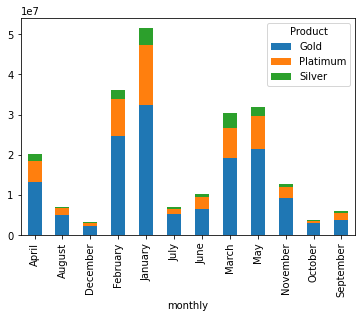

In [1338]:
plt.figure(figsize = (5,5))
output_plot4.T.plot(kind='bar',stacked=True)

Seasonality exists in terms of spend as we can see clearly from above graph that for first month the spend is quite high for all products.
for months 2 to 5 the there is no drastic change but spend decreased as compared to first month
and from months 6 to 12,spend has been decreased drastically.

In [1048]:
#5. Write user defined PYTHON function to perform the following analysis: 
'''You need to find top 10 customers for each city in terms of their repayment amount by different products and 
by different time periods i.e. year or month. 
The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and 
the function should 
automatically take these inputs while identifying the top 10 customers.'''

'You need to find top 10 customers for each city in terms of their repayment amount by different products and \nby different time periods i.e. year or month. \nThe user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and \nthe function should \nautomatically take these inputs while identifying the top 10 customers.#'

In [1349]:
table2['Month']=pd.to_datetime(table2['Month'])
table2['monthly']=table2['Month'].dt.strftime('%B')
table2['yearly']=table2['Month'].dt.strftime('%Y')


In [1552]:
def top_customer(product,time_period):
        if time_period=='monthly':
            f=table2.loc[table2.Product==product,['Customer','City','Product','Amount','monthly']].pivot_table(index=['Customer', 'Product', 'City','monthly'],values='Amount',aggfunc='sum').sort_values(by=['Amount','City'],ascending=False)
            return f.pivot_table(index=['City','Customer'],columns='monthly').sort_values(by=['City'],ascending=[True])
        elif time_period=='yearly':
            f_2=table2.loc[table2.Product==product,['Customer','City','Product','Amount','yearly']].pivot_table(index=['Customer','Product', 'City','yearly'],values='Amount',aggfunc='sum').sort_values(by=['Amount','City'],ascending=False)
            return f_2.pivot_table(index=['City','Customer'],columns='yearly').sort_values(by=['City'],ascending=[True])
           

In [1563]:
product=str(input("Please Enter Product as Gold/Silver/Platimum: "))
time_period=str(input("Please Enter time Period as yearly/monthly: "))

Please Enter Product as Gold/Silver/Platimum: Platimum
Please Enter time Period as yearly/monthly: yearly


In [1564]:
top_customer(product,time_period)

Amount                        
yearly                     2004        2005        2006
City       Customer                                    
BANGALORE  A19         50000.00    70000.00    80000.00
           A37        770552.62  1031641.04   893364.91
           A5          68809.07    57286.60    40008.00
           A52        263853.18   769849.81   600012.00
BOMBAY     A33         12275.98    40008.00    80016.00
           A36        772335.72   856921.95  1100022.00
           A4          30003.00    40004.00    40004.00
           A51        423029.79   459351.63   526425.98
           A70              NaN    20002.00         NaN
           A71         10002.00    10002.00         NaN
CALCUTTA   A99         10002.00         NaN         NaN
           A69              NaN    10000.00    10000.00
           A49        100020.00   130026.00    80016.00
           A98         10001.00         NaN         NaN
           A34         81344.52   372832.64   676907.97
           A20         70007.00    60006.00    70007.00
           A40       2576916.73  2527720.55  1886111.99
CHENNAI    A38       1951311.01  2408626.65  3111018.69
           A47         60000.00   160000.00    90000.00
           A56         36537.90   966666.69  3295868.87
COCHIN     A83              NaN         NaN    10002.00
           A54        490081.00  1829813.48  3255687.64
           A50        325086.07   338057.45   900000.00
           A35         31811.80   430194.67   800008.00
           A3          30000.00    50000.00    30000.00
           A21        110022.00   140028.00    80016.00
           A41       1752953.17  2486187.34  1241458.03
DELHI      A53        440318.31   679941.09   450320.75
PATNA      A55        335081.18   708035.12  2874384.90
TRIVANDRUM A48         70007.00   140014.00   100010.00
           A39       1342503.16  3699578.97  2580401.17
           A97         10000.00         NaN         NaN